### Preprocesamiento de Texto

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()                            # convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)            # quitar puntuación
    tokens = texto.split()
    tokens = [palabra for palabra in tokens if palabra not in stop_words]
    return ' '.join(tokens)

# Ejemplo
ejemplo = "Este es un texto generado por una inteligencia artificial como ChatGPT."
print(limpiar_texto(ejemplo))


texto generado inteligencia artificial chatgpt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Lista manual de stopwords en español
stop_words = {
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por',
    'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero',
    'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando',
    'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien',
    'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra',
    'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos',
    'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos',
    'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas',
    'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus',
    'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos',
    'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas'
}

 ### Vectorización del Texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

textos = [
    "La inteligencia artificial está cambiando el mundo.",
    "Este párrafo fue escrito por un humano.",
    "ChatGPT puede escribir textos bastante coherentes."
]

vectorizador = TfidfVectorizer()
X_vec = vectorizador.fit_transform(textos)

# Mostrar palabras clave y matriz TF-IDF
print(vectorizador.get_feature_names_out())
print(X_vec.toarray())

['artificial' 'bastante' 'cambiando' 'chatgpt' 'coherentes' 'el'
 'escribir' 'escrito' 'este' 'está' 'fue' 'humano' 'inteligencia' 'la'
 'mundo' 'por' 'puede' 'párrafo' 'textos' 'un']
[[0.37796447 0.         0.37796447 0.         0.         0.37796447
  0.         0.         0.         0.37796447 0.         0.
  0.37796447 0.37796447 0.37796447 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.37796447 0.37796447 0.         0.37796447 0.37796447
  0.         0.         0.         0.37796447 0.         0.37796447
  0.         0.37796447]
 [0.         0.40824829 0.         0.40824829 0.40824829 0.
  0.40824829 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.40824829 0.
  0.40824829 0.        ]]


 ### Entrenamiento del Modelo

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X = [
    "La inteligencia artificial genera respuestas automáticas.",
    "Este texto fue creado por una persona real.",
    "ChatGPT puede escribir textos en español.",
    "El clima en Quito es soleado en la mañana.",
    "Los modelos de lenguaje como GPT-3 son muy avanzados.",
    "Me gusta leer libros sobre historia y ciencia."
]

y = [1, 0, 1, 0, 1, 0]  # 0 = Humano, 1 = IA

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

modelo = make_pipeline(TfidfVectorizer(), MultinomialNB())
modelo.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Evaluación del Modelo

In [ ]:
# Dataset
textos_humanos = [
    "Disfruto leer en la biblioteca cada tarde.",
    "Los estudiantes preparan exposiciones en grupo.",
    "La comida ecuatoriana es muy variada.",
    "Mis padres viajaron a Loja el fin de semana.",
    "Me gusta escribir mis ideas en un diario.",
    "Visité la casa de mis abuelos en Riobamba.",
    "Los perros necesitan amor y cuidado.",
    "Cada mañana tomo café antes de trabajar.",
    "Mi hermana toca el piano desde los cinco años.",
    "Los niños juegan fútbol en el parque los domingos.",
    "Estudié toda la noche para mi examen de cálculo.",
    "Prefiero cocinar en casa que salir a comer.",
    "Escribí un poema para el aniversario de mis padres.",
    "El volcán Chimborazo está cubierto de nieve.",
    "Mi profesora explicó claramente el tema de hoy.",
    "Los jóvenes participaron en una feria científica.",
    "Siempre leo las noticias en la mañana.",
    "Ayer fui al cine con mis amigos.",
    "El nuevo restaurante ofrece platos tradicionales.",
    "Mi gato duerme la mayor parte del día."
]

textos_ia = [
    "Este texto ha sido generado por un modelo de lenguaje.",
    "La inteligencia artificial ofrece múltiples aplicaciones.",
    "GPT puede escribir artículos de investigación.",
    "Las máquinas ahora redactan contenido académico.",
    "Un sistema entrenado puede producir lenguaje natural.",
    "Este contenido fue generado automáticamente por IA.",
    "Los modelos de lenguaje aprenden de grandes corpora.",
    "Una red neuronal puede generar texto coherente.",
    "El modelo predice la siguiente palabra en una oración.",
    "La IA es capaz de simular respuestas humanas.",
    "Este ejemplo ilustra cómo funciona un generador de texto.",
    "ChatGPT responde preguntas en varios idiomas.",
    "El sistema utiliza millones de parámetros para responder.",
    "La red fue entrenada con datos de internet.",
    "GPT-4 mejora la coherencia de los textos generados.",
    "Las respuestas generadas imitan lenguaje humano.",
    "El texto puede adaptarse según el contexto solicitado.",
    "El modelo sintetiza información a partir de datos previos.",
    "La IA puede resumir documentos automáticamente.",
    "Este fragmento fue escrito por una inteligencia artificial."
]

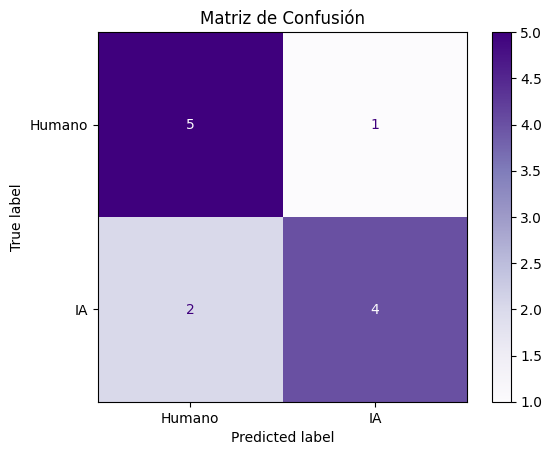

In [ ]:
# Código corregido con stopwords manuales
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay



# Función de preprocesamiento
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    tokens = texto.split()
    tokens = [palabra for palabra in tokens if palabra not in stop_words]
    return ' '.join(tokens)



X = textos_humanos + textos_ia
y = [0]*len(textos_humanos) + [1]*len(textos_ia)

# Preprocesar
X_limpio = [limpiar_texto(texto) for texto in X]

# División
X_train, X_test, y_train, y_test = train_test_split(
    X_limpio, y, test_size=0.3, random_state=42, stratify=y
)

# Vectorización y clasificación
vectorizador = TfidfVectorizer()
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

clasificador = LinearSVC()
clasificador.fit(X_train_vec, y_train)

# Evaluación
y_pred = clasificador.predict(X_test_vec)
report = classification_report(y_test, y_pred, target_names=["Humano", "IA"], zero_division=0, output_dict=True)

# Mostrar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Humano", "IA"], cmap="Purples")
plt.title("Matriz de Confusión")
plt.show()



📊 Evaluación del Clasificador de Texto (Humano vs IA):

              precision  recall  f1-score  support
Humano             0.71    0.83      0.77     6.00
IA                 0.80    0.67      0.73     6.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.76    0.75      0.75    12.00
weighted avg       0.76    0.75      0.75    12.00


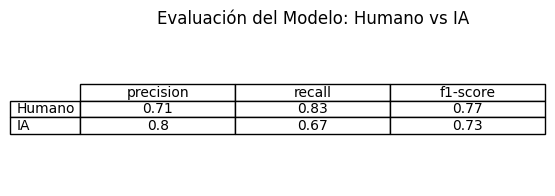

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Evaluación con nombres de clases y métricas detalladas
reporte = classification_report(y_test, y_pred, target_names=["Humano", "IA"], zero_division=0, output_dict=True)

# Convertir a DataFrame
df_reporte = pd.DataFrame(reporte).transpose()

# Redondear a dos decimales
df_reporte = df_reporte.round(2)

# Mostrar tabla bonita
print("📊 Evaluación del Clasificador de Texto (Humano vs IA):\n")
print(df_reporte)

# Si estás en Jupyter o Colab y quieres una tabla visual:
import matplotlib.pyplot as plt

# Solo mostrar precisión, recall y F1 de las dos clases
df_simple = df_reporte.loc[["Humano", "IA"], ["precision", "recall", "f1-score"]]

# Graficar tabla
plt.figure(figsize=(6, 2))
plt.table(cellText=df_simple.values,
          colLabels=df_simple.columns,
          rowLabels=df_simple.index,
          cellLoc='center',
          loc='center')
plt.axis('off')
plt.title("Evaluación del Modelo: Humano vs IA")
plt.show()
